<a href="https://colab.research.google.com/github/PabloLBandeira/biblioteca-Pandas/blob/main/ClusterizacaoKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yellowbrick


In [25]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [3]:
df_wines,_ = datasets.load_wine(as_frame=True, return_X_y=True)
df_wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
df_wines.duplicated().any()

False

In [6]:
df_wines.isna().sum().any()

False

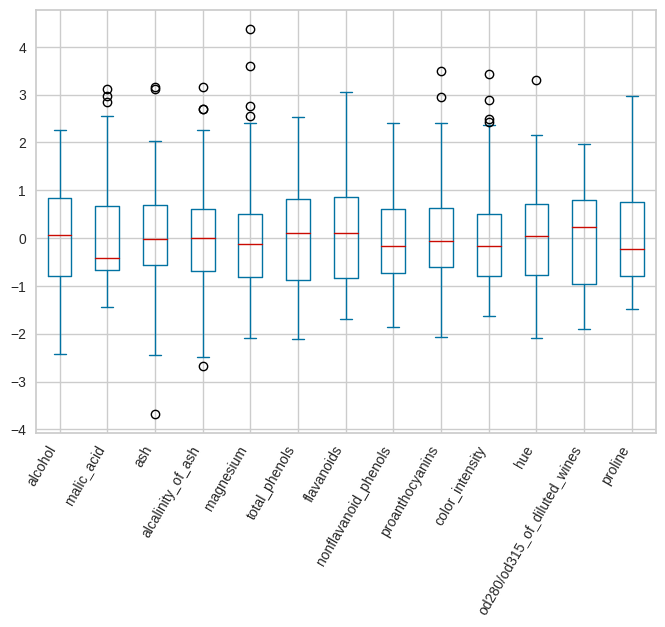

In [7]:
df_wines_scaled = df_wines.apply(scale)
df_wines.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');


In [8]:
outlier_rows = df_wines_scaled.abs().gt(3).any(axis=1)
outlier_rows.sum()

10

In [9]:
df_wines_scaled = df_wines_scaled[~outlier_rows]

## clusterização

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

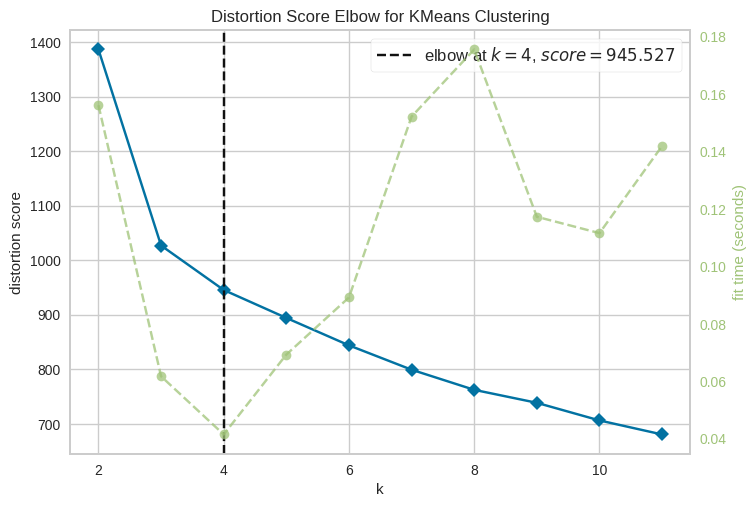

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(11));
visualizer.fit(df_wines_scaled)
visualizer.show()


In [11]:
model = KMeans(4, random_state=0).fit(df_wines_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
centroids = model.cluster_centers_
labels = model.labels_

# Interpretação


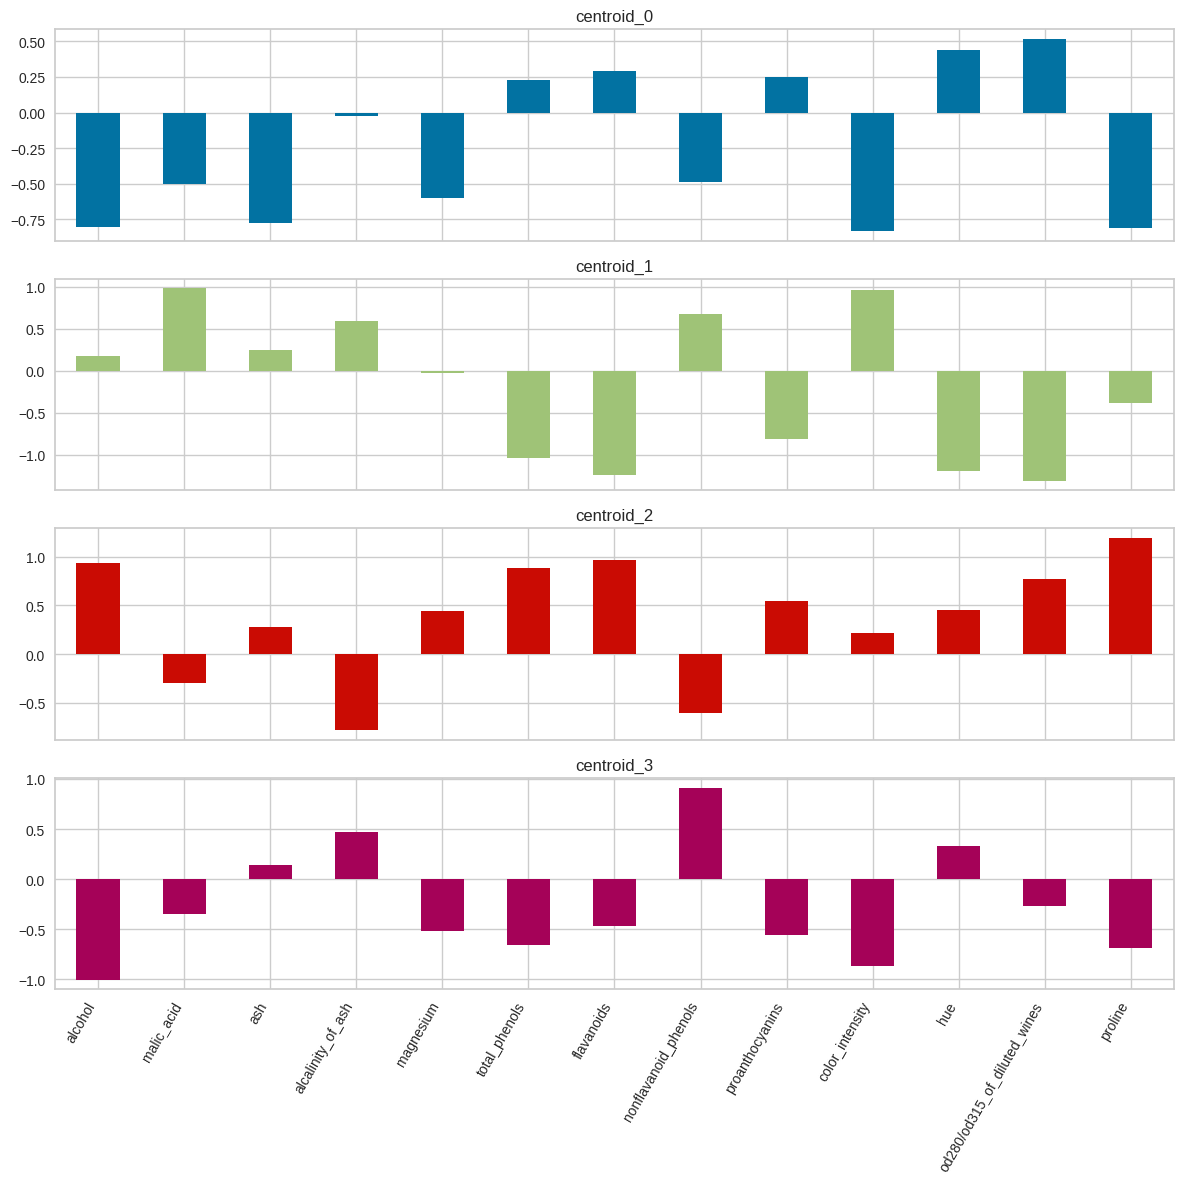

In [13]:
(
pd.DataFrame(centroids, columns=df_wines.columns).T.add_prefix('centroid_').plot.bar(subplots=True, figsize=(12,12), legend=False)
)

plt.xticks(rotation=60, ha='right');
plt.tight_layout()
plt.show()

In [14]:
centers = pd.DataFrame(centroids, columns=df_wines.columns)
centers

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.800760,-0.505083,-0.776052,-0.021398,-0.597146,0.225411,0.290563,-0.487805,0.251094,-0.831529,0.438378,0.516506,-0.808270
1,0.172174,0.976956,0.242941,0.586116,-0.028166,-1.037775,-1.242477,0.677690,-0.810143,0.953861,-1.186460,-1.304232,-0.383764
2,0.933991,-0.292951,0.277429,-0.779223,0.441846,0.879168,0.962118,-0.603992,0.539759,0.217932,0.453706,0.770323,1.190188
3,-1.002810,-0.345733,0.145786,0.468762,-0.518285,-0.658738,-0.465910,0.913321,-0.555233,-0.864487,0.328132,-0.263400,-0.683180


In [15]:
print(abs)


<built-in function abs>


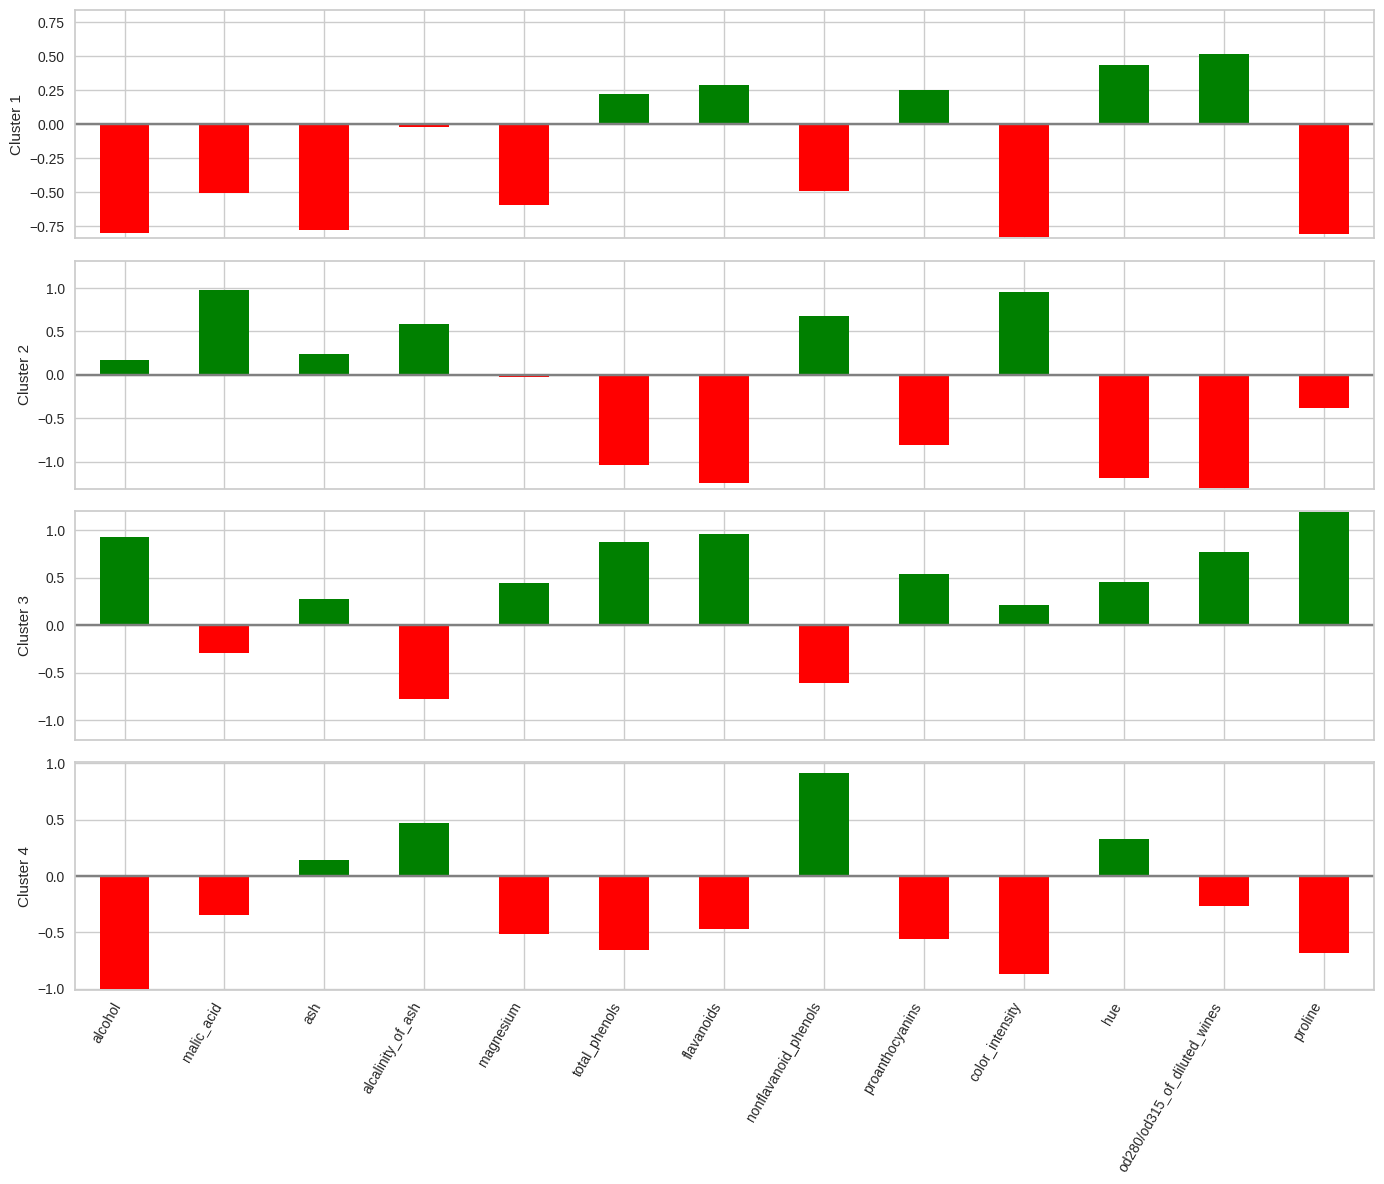

In [16]:
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i, ax in enumerate(axes):
    center = centers.loc[i,:]
    maxPC = 1.01 * center.abs().max()
    colors = ['green' if l > 0 else 'red' for l in center]
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)
    ax.axhline(0, color='grey')
    ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [20]:
(
    df_wines[~outlier_rows].assign(cluster=labels)
    .groupby('cluster')
    .agg(['mean', 'min', 'median', 'max'])
)

alcohol                       malic_acid                     \
              mean    min  median    max       mean   min median   max   
cluster                                                                  
0        12.352368  11.45  12.335  13.86   1.773684  0.89  1.570  4.31   
1        13.140000  12.20  13.160  14.16   3.424681  1.29  3.300  5.65   
2        13.756724  12.85  13.755  14.83   2.010000  1.35  1.765  4.04   
3        12.188800  11.41  12.080  13.34   1.951200  0.74  1.610  4.43   

              ash        ...    hue       od280/od315_of_diluted_wines        \
             mean   min  ... median   max                         mean   min   
cluster                  ...                                                   
0        2.154211  1.70  ...  1.050  1.42                     2.977368  2.14   
1        2.432979  2.10  ...  0.670  0.96                     1.688298  1.27   
2        2.442414  2.04  ...  1.065  1.28                     3.157069  2.51   
3        2.406400  1.98  ...  0.980  1.45                     2.425200  1.51   

                          proline                         
        median   max         mean    min  median     max  
cluster                                                   
0        3.035  3.64   493.078947  278.0   456.5   886.0  
1        1.680  2.47   626.382979  415.0   620.0   880.0  
2        3.135  4.00  1120.637931  680.0  1095.0  1680.0  
3        2.420  3.30   532.360000  315.0   495.0   870.0  

[4 rows x 52 columns]

In [23]:
(
    df_wines[~outlier_rows].assign(cluster=labels)
    .groupby('cluster')
    .mean()
    .T
    .style.background_gradient(axis=1)
)

cluster,0,1,2,3
alcohol,12.352368,13.140000,13.756724,12.188800
malic_acid,1.773684,3.424681,2.010000,1.951200
ash,2.154211,2.432979,2.442414,2.406400
alcalinity_of_ash,19.423684,21.446809,16.900000,21.056000
magnesium,91.236842,99.340426,106.034483,92.360000
total_phenols,2.435789,1.647447,2.843793,1.884000
flavanoids,2.318684,0.791702,2.987586,1.565200
nonflavanoid_phenols,0.301316,0.445957,0.286897,0.475200
proanthocyanins,1.734211,1.128511,1.898966,1.274000
color_intensity,3.135789,7.263191,5.561897,3.059600


In [26]:
silhouette_score(df_wines_scaled[~outlier_rows], labels)

<ipython-input-26-cb769b07a8aa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  silhouette_score(df_wines_scaled[~outlier_rows], labels)


0.2539887060307323